## Import Library

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

## Load Dataset (Dummy Data Test)

In [30]:
data = pd.read_excel('./press.xlsx')
data.head()

,date,press,predictive_value
0,2019-02-27,연합뉴스,93
1,2019-02-27,머니투데이,61
2,2019-02-27,파이낸셜뉴스,44
3,2019-02-27,서울경제,63
4,2019-02-27,한국경제,42


## Create Windows

In [31]:
predict = data['predictive_value'].values
predict

array([ 93,  61,  44,  63,  42,  59,  44,  44,  41,   1,  32,   8,  68,
        42,  37,  89,  52,  43,  41,  53,  76,  43,  15,  42,  94,   5,
        19,  82,  17,  88, 122,  29,  93,  74,  62,  98,  75,   8,  92,
        99,  58,  19,  88,  47,  91,  55,   1,  99,  71,   6,  68,  92,
        69,  56,  52,  13,  91,  81,  25,  46,  86,  62,  72,  42,  66,
        18,   1,  15,  56,  46,  87,  69,  91,  28,   4,  84,  93,  92,
        11,  24,  88,  42,  82,  62,  95,   3,  61,  58,  62,  32,  32,
         1,  91,  16,  72,  28,  41,  93,  74,  79,  88,  68,   5,   1,
        27,   7,  12,  51,  34,  45,   6,  43,  53,  13,  74,  84,  36,
        88,  88,  93,  93,  28,  12,   9,  78,  76,  32,  23,  71,  73,
        71,  87,  12,  82,  58,  12,  26,  13,  72,  43,  69,  38,  22,
        28,  28,  54,   5,  74,  12,  38,  37,  47,  23,  44,  34,  19,
        22,  78,  57,  61,  81,  79,  85,  43,  82,  41,  85,  62,  71,
        87,  74,   3,  72,  92,  97,  83,  11,  42,  62,  59,  7

In [32]:
seq_len = 50      # 최근 50일의 예측점수를 관측치로 설정
sequence_length = seq_len + 1 # 하루가 지날 때마다 관측치 구간도 하루씩 이동

result = []
for index in range(len(predict) - sequence_length):      # predictive_value: 언론사의 예측률 변수
    result.append(predict[index: index + sequence_length])

## Normalize Data

In [33]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]   # 데이터 정규화
    normalized_data.append(normalized_window)
result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((545, 50, 1), (61, 50, 1))

## Build a Model

In [34]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))   # 관측치: 50일
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


## Training

In [35]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=20)     # 20번 정도만 테스트

Epoch 1/20
55/55 [==============================] - 24s 66ms/step - loss: 27.5753 - val_loss: 26.8158
Epoch 2/20
55/55 [==============================] - 2s 44ms/step - loss: 20.8008 - val_loss: 22.7042
Epoch 3/20
55/55 [==============================] - 2s 43ms/step - loss: 26.1770 - val_loss: 20.6615
Epoch 4/20
55/55 [==============================] - 2s 42ms/step - loss: 13.1045 - val_loss: 19.8000
Epoch 5/20
55/55 [==============================] - 2s 42ms/step - loss: 25.4657 - val_loss: 16.2456
Epoch 6/20
55/55 [==============================] - 2s 42ms/step - loss: 16.2831 - val_loss: 18.6199
Epoch 7/20
55/55 [==============================] - 2s 42ms/step - loss: 31.5558 - val_loss: 14.7127
Epoch 8/20
55/55 [==============================] - 2s 42ms/step - loss: 22.9761 - val_loss: 12.2840
Epoch 9/20
55/55 [==============================] - 2s 42ms/step - loss: 25.7128 - val_loss: 11.4981
Epoch 10/20
55/55 [==============================] - 2s 42ms/step - loss: 12.5510 - val_lo

## Prediction

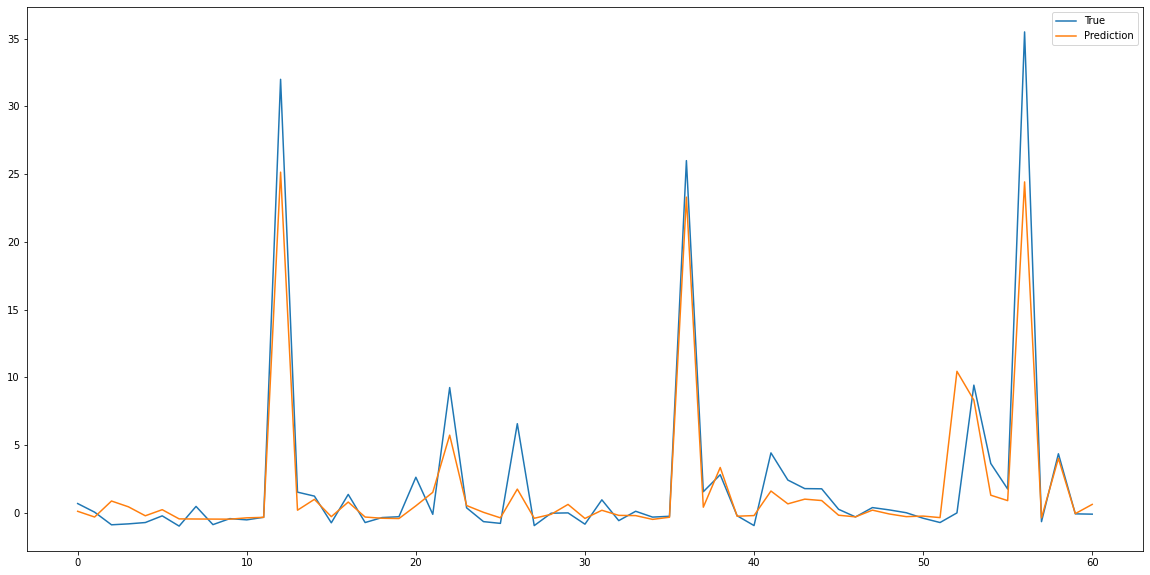

In [36]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()